# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [ ]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 63 (delta 2), reused 1 (delta 0), pack-reused 56 (from 1)
Receiving objects: 100% (63/63), 13.96 MiB | 22.73 MiB/s, done.
Resolving deltas: 100% (12/12), done.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [9]:
#1
import pandas as pd
import numpy as np
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv')

#Remove non-numeric characters
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)

#Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Handle missing values
missing_price_count = df['Price'].isna().sum()
print(f"Number of missing values in Price after cleaning: {missing_price_count}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/wrangling/assignment/data/airbnb_hw.csv'

I am removing non numeric characters to purge the data of symbols which are irrelevent. I am then converting the type to numeric so the machine can read the data.

In [11]:
#2
police_data = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv')

#Clean subject_injury variable
police_data['subject_injury'] = police_data['subject_injury'].fillna('Unknown')
police_data['subject_injury'] = police_data['subject_injury'].map({'Yes': 'Yes', 'No': 'No', 'Unknown': np.nan})

#Calculate proportion of missing values
missing_injury_proportion = police_data['subject_injury'].isna().mean()
print(f"Proportion of missing values in subject_injury: {missing_injury_proportion:.2%}")

#Cross-tabulate with force_type
crosstab = pd.crosstab(police_data['subject_injury'], police_data['force_type'])
print(crosstab)


FileNotFoundError: [Errno 2] No such file or directory: '/content/wrangling/assignment/data/mn_police_use_of_force.csv'

In [ ]:
#3
pretrial_data = pd.read_parquet('/content/wrangling/assignment/data/justice_data.parquet')

#Clean WhetherDefendantWasReleasedPretrial variable
pretrial_data['WhetherDefendantWasReleasedPretrial'] = pretrial_data['WhetherDefendantWasReleasedPretrial'].map({'Yes': 1, 'No': 0})
pretrial_data['WhetherDefendantWasReleasedPretrial'] = pretrial_data['WhetherDefendantWasReleasedPretrial'].replace({np.nan: np.nan})

#Check cleaned data
print(pretrial_data['WhetherDefendantWasReleasedPretrial'].head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: WhetherDefendantWasReleasedPretrial, dtype: float64


In [ ]:
#4
#Clean ImposedSentenceAllChargeInContactEvent
pretrial_data['ImposedSentenceAllChargeInContactEvent'] = pretrial_data['ImposedSentenceAllChargeInContactEvent'].fillna('No Sentence')  # Example handling

#Investigate relationship with SentenceTypeAllChargesAtConvictionInContactEvent
correlation_check = pretrial_data.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentenceAllChargeInContactEvent'].apply(lambda x: x.isna().mean())
print(correlation_check)


SentenceTypeAllChargesAtConvictionInContactEvent
0    0.0
1    0.0
2    0.0
4    0.0
9    0.0
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64


The choices I made in cleaning these values were to handle any missing values, provide meaningful replacement for NaN, and attain consistency for the way the variables are treated.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

count    5458.000000
mean     1991.937156
std        24.083712
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64
Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     49
2025.0      6
2026.0      1
Name: count, Length: 87, dtype: int64


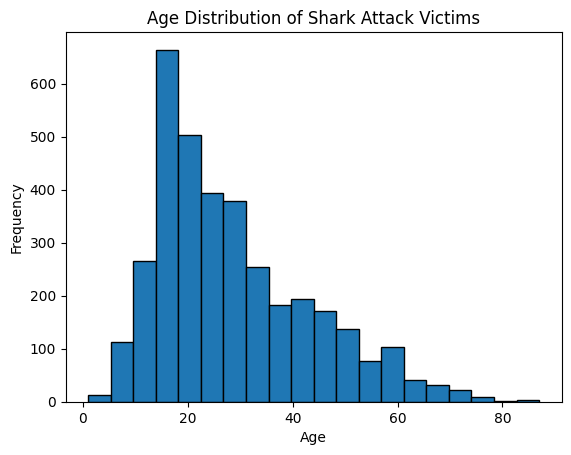

Proportion of male victims: 0.85
Proportion of male victims: 0.85
Proportion of unprovoked attacks: 0.83
Type           ?  Provoked   Unknown  Unprovoked   invalid  questionable  \
Sex                                                                        
female       NaN  0.038532  0.005505    0.873394  0.062385      0.003670   
lli          NaN       NaN       NaN    1.000000       NaN           NaN   
male    0.000335  0.088896  0.002013    0.824891  0.056692      0.004361   

Type    sea disaster  under investigation  watercraft  
Sex                                                    
female      0.005505             0.001835    0.009174  
lli              NaN                  NaN         NaN  
male        0.011406                  NaN    0.011406  
Fatal Y/N                   F         M         N   UNKNOWN   Unknown  \
Type                                                                    
?                         NaN       NaN  1.000000       NaN       NaN   
Provoked       

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/GSAF5.xls')

# Drop columns with all NaN values
df.dropna(axis=1, how='all', inplace=True)

# Clean the Year column (remove non-numeric values, if any)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with invalid or missing Year values
df.dropna(subset=['Year'], inplace=True)

# Filter rows for attacks since 1940
df = df[df['Year'] >= 1940]

# Describe the range of years
print(df['Year'].describe())

# Check if attacks are increasing, decreasing, or constant
attacks_over_time = df['Year'].value_counts().sort_index()
print(attacks_over_time)

# Clean the Age column (remove non-numeric values, if any)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with invalid or missing Age values
df.dropna(subset=['Age'], inplace=True)

# Create a histogram of ages
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Shark Attack Victims')
plt.show()

# Clean the Sex column (standardize values)
df['Sex'] = df['Sex'].str.strip().str.lower()
df['Sex'] = df['Sex'].replace({'m': 'male', 'f': 'female'})

# Calculate the proportion of male victims
male_proportion = df['Sex'].value_counts(normalize=True)['male']
print(f"Proportion of male victims: {male_proportion:.2f}")

# Clean the Sex column (standardize values)
df['Sex'] = df['Sex'].str.strip().str.lower()
df['Sex'] = df['Sex'].replace({'m': 'male', 'f': 'female'})

# Calculate the proportion of male victims
male_proportion = df['Sex'].value_counts(normalize=True)['male']
print(f"Proportion of male victims: {male_proportion:.2f}")

# Clean the Type column
df['Type'] = df['Type'].str.strip().str.lower()
df['Type'] = df['Type'].replace({'provoked': 'Provoked', 'unprovoked': 'Unprovoked'})
df['Type'] = df['Type'].fillna('Unknown')

# Calculate the proportion of unprovoked attacks
unprovoked_proportion = df['Type'].value_counts(normalize=True)['Unprovoked']
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2f}")

# Clean the Fatal Y/N column
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper()
df['Fatal Y/N'] = df['Fatal Y/N'].replace({'YES': 'Y', 'NO': 'N'})
df['Fatal Y/N'] = df['Fatal Y/N'].fillna('Unknown')

# Are sharks more likely to attack men or women?
attack_by_sex = df.groupby('Sex')['Type'].value_counts(normalize=True).unstack()
print(attack_by_sex)

# Is the attack more or less likely to be fatal when provoked or unprovoked?
fatal_by_type = df.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()
print(fatal_by_type)

# Is the attack more or less likely to be fatal when the victim is male or female?
fatal_by_sex = df.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()
print(fatal_by_sex)



8. Sharks are more likely to attack Women unprovoked, Attacks are more likely to be fatal when it is unprovoked, and they are more likely to be fatal when attacking men


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1.
This paper focuses on data tidying, an essential but often overlooked part of data cleaning. It introduces the concept of "tidy data," where each variable is placed in a column, each observation is stored as a row, and each type of observational unit is kept in its own table. By following this structured format, data analysis becomes much more efficient, minimizing the time and effort spent on cleaning and restructuring datasets.

2.
The tidy data standard is meant to simplify data cleaning by providing a clear and consistent structure. When data is organized predictably, analysts can quickly explore and analyze it without the constant need to reshape it for different tools. This standard also improves compatibility between data analysis tools, reducing the time spent converting outputs from one format to another.

3.
This phrase draws on Tolstoy’s famous quote. It highlights that tidy datasets all follow a standardized structure, making them easy to work with, while messy datasets can be disorganized in countless different ways, requiring unique fixes for each situation.
This means that while it is usually easy to determine what counts as an observation or a variable in a given dataset, defining these concepts in a general sense is much harder. Depending on the context, the same data structure could be interpreted in different ways. For example, in one scenario, "height" and "weight" might be separate variables, while in another, they could be considered values within a broader "measurement type" variable.

4.
Wickham defines values as the individual data points within a dataset, whether numerical or categorical. Variables are collections of values that measure the same characteristic across different units, such as height or temperature. Observations are sets of values recorded for a single unit, like all measurements taken for a person, an event, or a specific time point.

5.
Tidy data follows a specific definition: each variable is placed in its own column, each observation is in its own row, and each type of observational unit is kept in a separate table. This approach ensures that data is structured consistently, making it easier to manipulate and analyze. It aligns with relational database principles but is framed in a way that suits statistical analysis.

6.
Messy datasets commonly suffer from a few major issues. One frequent problem is when column headers store values rather than variable names, making it difficult to extract data systematically. Another issue arises when multiple variables are stored in a single column, requiring additional steps to separate them. Sometimes, variables are spread across both rows and columns, complicating data manipulation. A dataset may also mix different types of observational units in a single table, rather than keeping them separate. Finally, data for a single type of observational unit might be spread across multiple tables, making it harder to work with.

Table 4 is messy because it uses column headers to represent values instead of variable names. This format is designed for presentation rather than analysis, making it difficult to extract and work with the data efficiently.

Melting a dataset refers to restructuring it from a wide format to a long format. This process involves turning column headers into values of a new variable, standardizing the dataset so that it aligns with tidy data principles. By melting data, analysts can more easily manipulate and analyze it using common tools.

7.
Table 11 is messy because it spreads data across multiple columns, with separate columns for each day’s observations, making it difficult to analyze trends over time. In contrast, Table 12 is tidy and molten because it consolidates the date information into a single column, ensuring that each row represents a single observation. This structure makes it much easier to work with and analyze.

8.
The "chicken-and-egg" problem with tidy data is that while it significantly simplifies analysis, most existing data tools are designed to handle messy data. Because of this, analysts often continue working with unstructured datasets rather than converting them to a tidy format. Without broader adoption of tidy data principles, it is difficult to build better tools that fully support them, creating a cycle that slows progress in data wrangling.

Looking ahead, Wickham hopes for continued research into the human and cognitive aspects of data tidying. He envisions the development of better tools that can automatically recognize and adapt between different data structures, making data wrangling easier and more efficient. He also sees potential in exploring alternative data storage formats that could optimize memory usage and performance while maintaining the benefits of tidy data. Ultimately, he hopes this framework serves as a foundation for further advancements in how data is structured and processed.



**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?